# Rozkład według wartości osobliwych

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import requests
from skimage import io, color
from io import BytesIO

**Zadanie 1.**

Wykorzystanie rozkładu SVD do kompresji czarno-białych obrazków.

Obrazek w skali szarości to tablica pikseli. Jeżeli jasność/kolor pikseli wyrazimy w skali szarości, to taki obrazek możemy potraktować jako zwykłą macierz. A zatem możliwe jest przeprowadzenie rozkładu SVD takiego rysunku/zdjęcia. Rozkład taki można wykorzystać do skompresowania informacji zawartych w macierzy. W tym celu, po przeprowadzeniu rozkładu, wybieramy $n$ **największych wartości osobliwych oraz związane z nimi lewo- i prawostronne wektory osobliwe** i przybliżamy oryginalną macierz [iloczynem diadycznym](https://pl.wikipedia.org/wiki/Iloczyn_diadyczny) tych wartości (czyli macierzami rzędu 1.).

Przygotowanie danych (szczegóły na zajęciach z uczenia maszynowego)

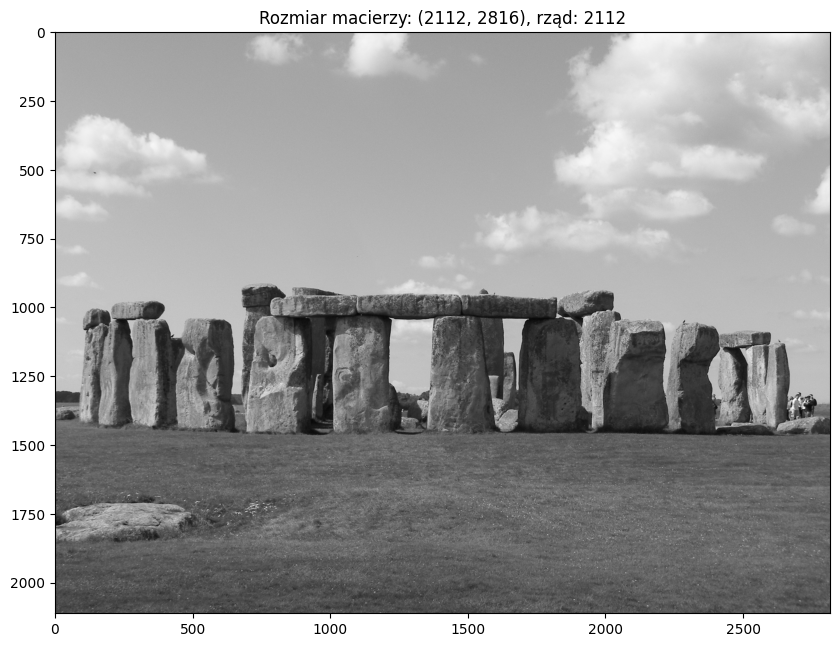

In [2]:
url = 'https://upload.wikimedia.org/wikipedia/commons/3/3c/Stonehenge2007_07_30.jpg' # Adres do obrazka

# obsługa pobierania z sieci
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'
}
response = requests.get(url, headers=headers)
arr = BytesIO(response.content)

# import obrazka i konwersja do 2D
imag = io.imread(arr)
imag = color.rgb2gray(imag)

plt.figure(figsize=(10,10))
plt.imshow(imag,cmap='gray')
plt.title(f'Rozmiar macierzy: {imag.shape}, rząd: {np.linalg.matrix_rank(imag)}')
plt.show()

**Rozkład SVD**

In [3]:
# rozkład według wartości osobliwych
U,s,Vt = np.linalg.svd(imag) # standardowo s jest wektorem wartości szczegółnych, a nie macierzą.

Informacja zapisana w pierwszej wartości szczególnej oraz związanych z nią wektorami lewo- i prawostronnym daje macierz o rzędzie 1. Wymiary tej macierzy odpowiadają wymiarom obrazka (wynika to z użycia iloczynu diadycznego).

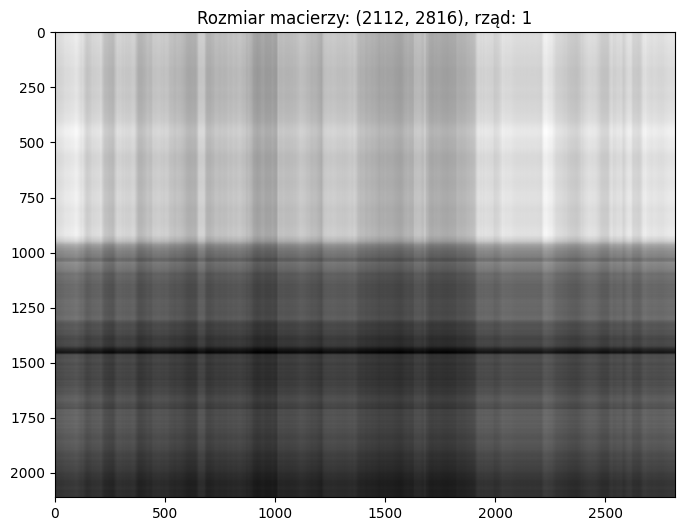

In [4]:
first = np.outer(U[:,0],Vt[0,:])*s[0]
plt.figure(figsize=(8,8))
plt.title(f'Rozmiar macierzy: {first.shape}, rząd: {np.linalg.matrix_rank(first)}')
plt.imshow(first,cmap='gray')

**Zadanie**

Wyświetl kilka pierwszych macierzy otrzymanych z iloczynów diadycznych kolejnych wartości osobliwych i związanych z nimi wektorów

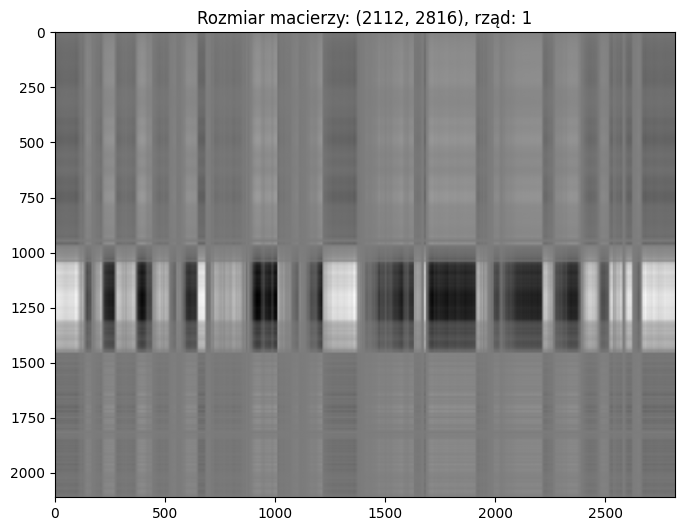

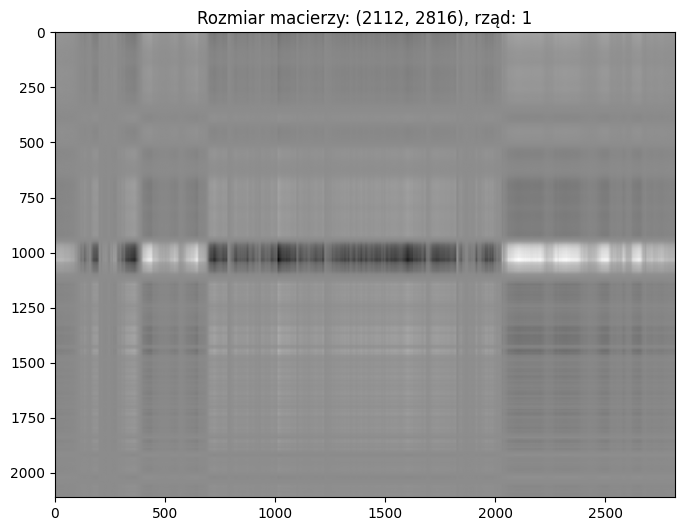

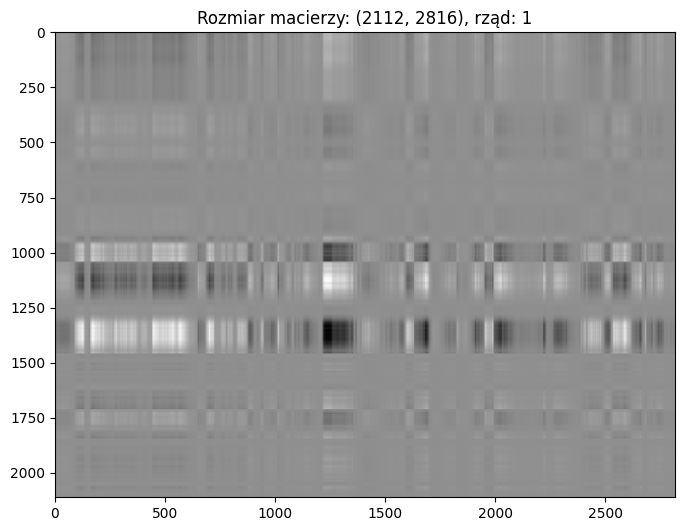

In [5]:
# wyswietlmy 2  
for i in range(1,4):
    cur = np.outer(U[:,i],Vt[i,:])*s[i]
    plt.figure(figsize=(8,8))
    plt.title(f'Rozmiar macierzy: {cur.shape}, rząd: {np.linalg.matrix_rank(cur)}')
    plt.imshow(cur,cmap='gray')
    

**Właściwa kompresja**

Aby przybliżyć oryginalny obrazek, musimy **dodać do siebie** kolejne macierze rzędu pierwszego 1. Poniżej suma pierwszych 5 takich macierzy.

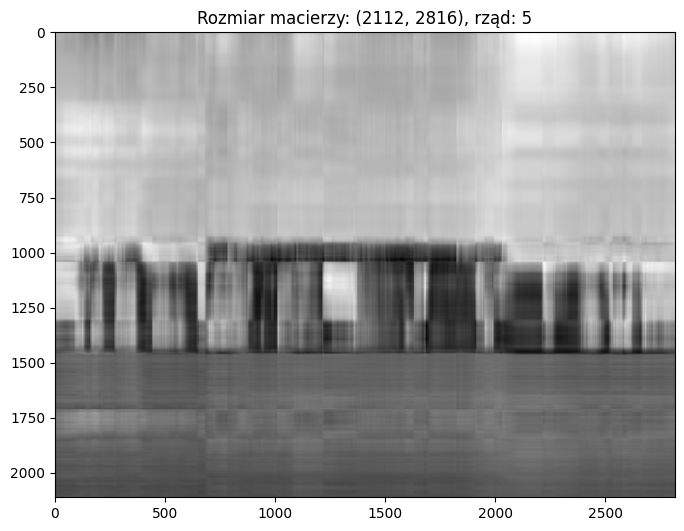

In [6]:
res = np.zeros(imag.shape)
for i in range(0,5):
    res += np.outer(U[:,i],Vt[i,:])*s[i]

plt.figure(figsize=(8,8))
plt.title(f'Rozmiar macierzy: {res.shape}, rząd: {np.linalg.matrix_rank(res)}')
plt.imshow(res,cmap='gray')

**Zadanie**

Sprawdz rezultaty dla sumy mniejszej/większej liczby macierzy rzędu 1. Znajdź liczbę macierzy, dla której rozróżnienie przybliżenia od oryginału nie będzie możliwe (dla człowieka). Oblicz ile pamięci potrzeba do zapisania informacji niezbędnych do odtworzenia takiego przybliżenia (*pamiętaj, że zapamiętujemy wartości i wektory szczególne, a nie same macierze rzędu 1.*). Porównaj otrzymany wynik z rozmiarem org. obrazka. Jaki stopień kompresji udało Ci się osiągnąć?

Original has 5947392 elements
Compressed with (k=100) has 492900 elements
Decreased in size by 12.07x


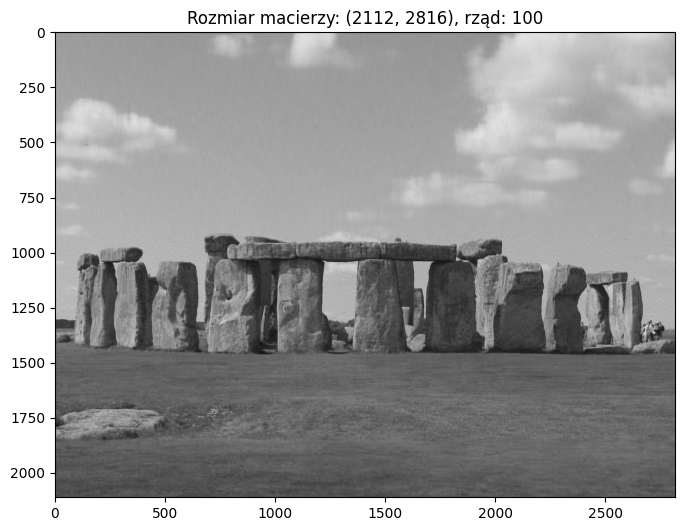

In [7]:
res = np.zeros(imag.shape)
for i in range(0,100):
    res += np.outer(U[:,i],Vt[i,:])*s[i]

plt.figure(figsize=(8,8))
plt.title(f'Rozmiar macierzy: {res.shape}, rząd: {np.linalg.matrix_rank(res)}')
plt.imshow(res,cmap='gray')

# wyglada ze rzad 100 jest juz calkiem dobry
k = 100
m, n = imag.shape
compressed_size = m*k + k + k*n
original_size = m * n
compression_ratio = original_size / compressed_size
print(f"Original has {original_size} elements")
print(f"Compressed with (k={k}) has {compressed_size} elements")
print(f"Decreased in size by {compression_ratio:.2f}x")

**Zadanie**

Powtórz eksperyment dla innego zdjęcia/rysunku. Powyższy kod zadziała dla dowolnego obrazka w formacie jpg. Aby zmienić rysunek należy zmienić adres w zmiennej `url`. Spróbuj znaleźć obrazki, dla których wymagane jest zapamiętanie mniejszej ilości informacji (*wskazówka: poszukaj obrazków zawierających powtarzające się wzory*).

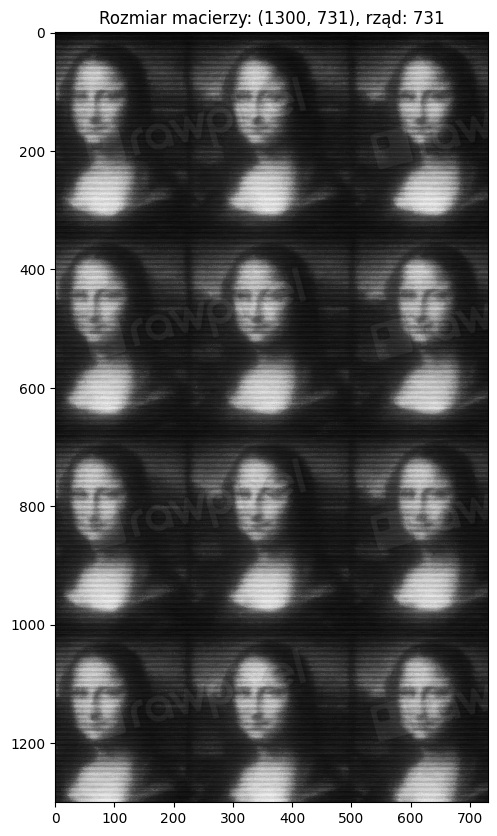

In [8]:
# to co bylo wyzej
url = 'https://images.rawpixel.com/image_1300/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDI1LTA1L3NyLWltYWdlLTI5MDUyNS1ibS12aHMtcy0zNTRfMi5qcGc.jpg' # Adres do obrazka
# 4000 w(what that means?) aha width ok

# obsługa pobierania z sieci
headers ={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'
}
response = requests.get(url, headers=headers)
arr = BytesIO(response.content)

# import obrazka i konwersja do 2D
imag = io.imread(arr)
imag = color.rgb2gray(imag)

plt.figure(figsize=(10,10))
plt.imshow(imag,cmap='gray')
plt.title(f'Rozmiar macierzy: {imag.shape}, rząd: {np.linalg.matrix_rank(imag)}')
plt.show()

Original has 950300 elements
Compressed with (k=70) has 142240 elements
Decreased in size by 6.68x


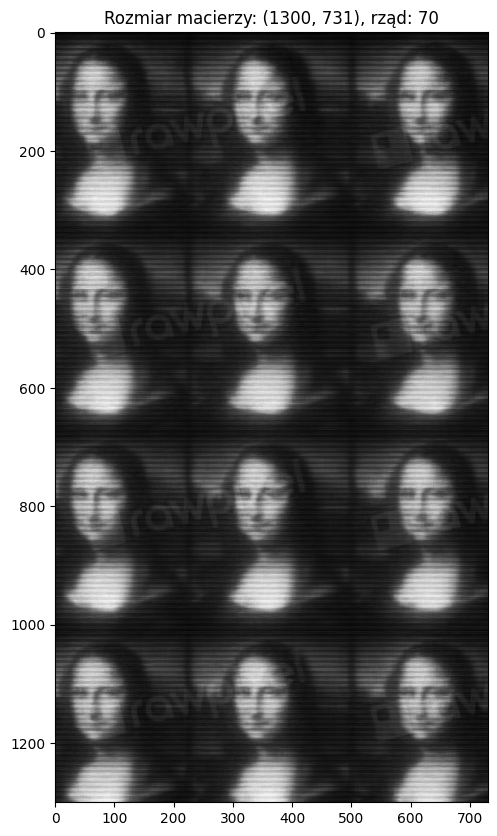

In [9]:
# rozkład według wartości osobliwych
U,s,Vt = np.linalg.svd(imag) # standardowo s jest wektorem wartości szczegółnych, a nie macierzą.

res = np.zeros(imag.shape)
for i in range(0,70):
    res += np.outer(U[:,i],Vt[i,:])*s[i]

plt.figure(figsize=(10,10))
plt.title(f'Rozmiar macierzy: {res.shape}, rząd: {np.linalg.matrix_rank(res)}')
plt.imshow(res,cmap='gray')

# wyglada ze rzad 70 jest juz calkiem dobry
k = 70
m, n = imag.shape
compressed_size = m*k + k + k*n
original_size = m * n
compression_ratio = original_size / compressed_size
print(f"Original has {original_size} elements")
print(f"Compressed with (k={k}) has {compressed_size} elements")
print(f"Decreased in size by {compression_ratio:.2f}x") # aha not so much, bad pic for this task definitely

**Zadanie**

Zastanów się nad bardziej poprawnymi (nie na oko) sposobami oceny jakości tej metody kompresji

k=  5: MSE=0.000905, RMSE=0.0301, compression=93.53x
k= 10: MSE=0.000527, RMSE=0.0229, compression=46.77x
k= 20: MSE=0.000405, RMSE=0.0201, compression=23.38x
k= 50: MSE=0.000289, RMSE=0.0170, compression=9.35x
k=100: MSE=0.000203, RMSE=0.0142, compression=4.68x
k=200: MSE=0.000105, RMSE=0.0102, compression=2.34x


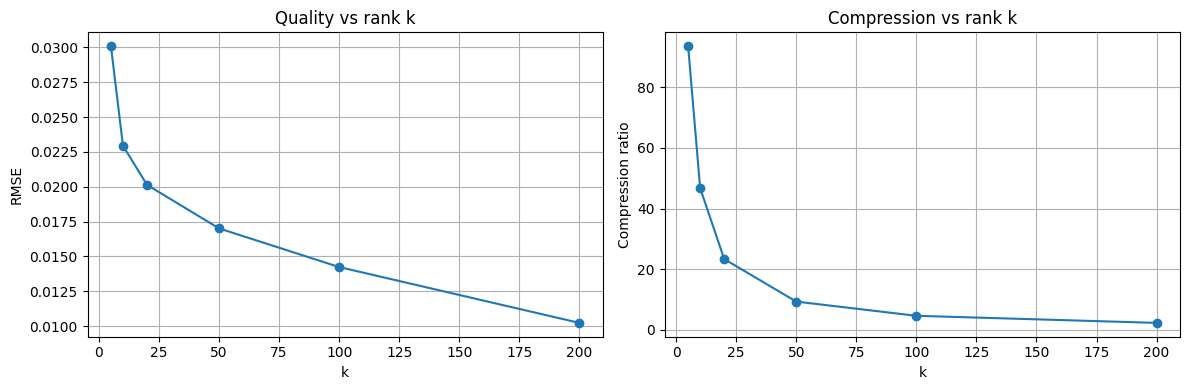

In [10]:
# lets use mse idk
# ok there is smth called psnr . peak signal to noise ratio
from sklearn.metrics import mean_squared_error

def reconstruct_from_svd(U, s, Vt, k):
    m, n = U.shape[0], Vt.shape[1]
    res = np.zeros((m, n))
    for i in range(k):
        res += np.outer(U[:, i], Vt[i, :]) * s[i]
    return res

def evaluate_ks(imag, U, s, Vt, k_values):
    m, n = imag.shape
    results = []
    for k in k_values:
        res = reconstruct_from_svd(U, s, Vt, k)
        mse = mean_squared_error(imag.ravel(), res.ravel())
        rmse = np.sqrt(mse)

        compressed_size = m*k + k + k*n
        original_size = m * n
        compression_ratio = original_size / compressed_size
 
        results.append((k, mse, rmse, compression_ratio))
        print(f'k={k:3d}: MSE={mse:.6f}, RMSE={rmse:.4f}, '
              f'compression={compression_ratio:.2f}x')
    return results

# check different k values
k_values = [5, 10, 20, 50, 100, 200]
results = evaluate_ks(imag, U, s, Vt, k_values)

ks = [r[0] for r in results]
rmses = [r[2] for r in results]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(ks, rmses, 'o-')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('Quality vs rank k')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(ks, [r[3] for r in results], 'o-')
plt.xlabel('k')
plt.ylabel('Compression ratio')
plt.title('Compression vs rank k')
plt.grid(True)
plt.tight_layout()
plt.show()